In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [35]:
data=pd.read_csv("Wine_Quality_Data.csv")

In [36]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [37]:
data.shape

(6497, 13)

In [38]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

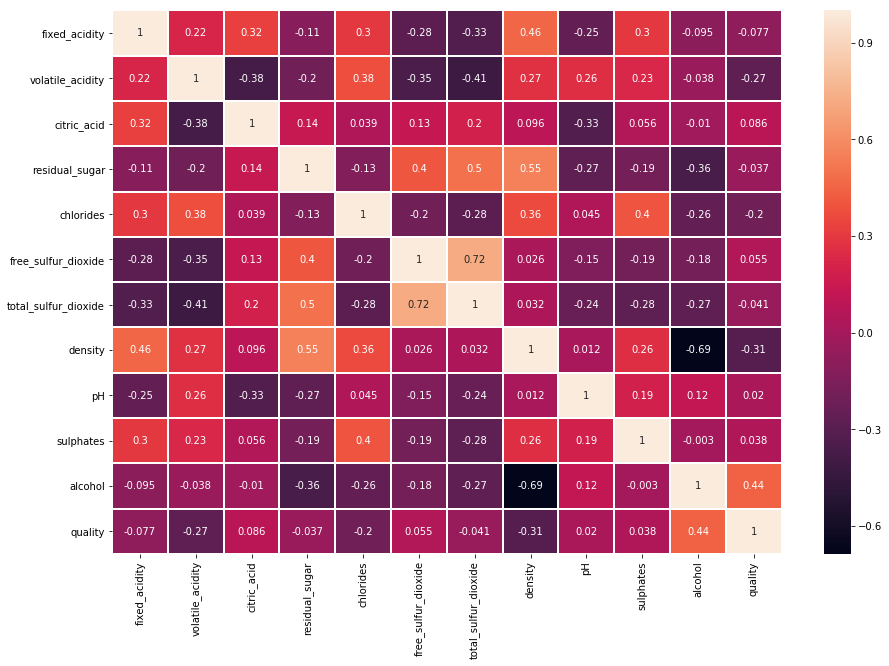

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths="1",linecolor="w")

In [40]:
data["color"].head()

0    red
1    red
2    red
3    red
4    red
Name: color, dtype: object

In [41]:
leb=preprocessing.LabelEncoder()

In [42]:
leb

LabelEncoder()

In [43]:
data["color"]=leb.fit_transform(data["color"])

In [44]:
data["color"].unique()

array([0, 1], dtype=int64)

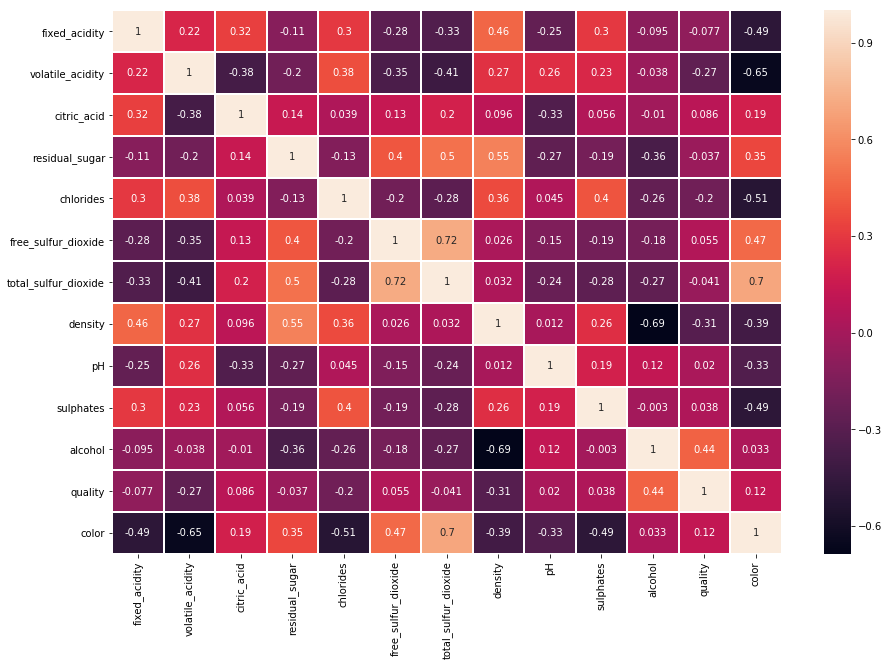

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths="1",linecolor="w")

In [46]:
training_data=data[["volatile_acidity","chlorides","sulphates"]]

In [47]:
output_data=data["color"]

In [48]:
train_x,test_x,train_y,test_y=train_test_split(training_data,output_data,test_size=0.3,random_state=42)

In [49]:
model=LogisticRegression()

In [50]:
model.fit(train_x,train_y)

c:\users\ashish\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions=model.predict(test_x)

In [52]:
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
score=accuracy_score(predictions,test_y)

In [54]:
score

0.9153846153846154

In [55]:
kn_model=KNeighborsClassifier()

In [56]:
param={"n_neighbors":[2,3,4,5,6,7,8]}

In [57]:
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid=param)

In [60]:
grid_pred=grid_search.predict(test_x)

In [61]:
grid_score=accuracy_score(grid_pred,test_y)

In [62]:
grid_score

0.9502564102564103

In [65]:
grid_search.best_params_

{'n_neighbors': 3}